# HEART DISEASE CLASSIFICATION


**We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use Machine Learning Algorithms.**

Data contains;

- age - age in years

- sex - (1 = male; 0 = female)

- cp - chest pain type

- trestbps - resting blood pressure (in mm Hg on admission to the hospital)

- chol - serum cholestoral in mg/dl

- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- restecg - resting electrocardiographic results

- thalach - maximum heart rate achieved

- exang - exercise induced angina (1 = yes; 0 = no)

- oldpeak - ST depression induced by exercise relative to rest

- slope - the slope of the peak exercise ST segment

- ca - number of major vessels (0-3) colored by flourosopy

- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

- target - have disease or not (1=yes, 0=no)

# Importing Datasets and Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# READ DATA

In [ ]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Data Exploration

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<ipython-input-8-3b4fd579e118>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='bwr')


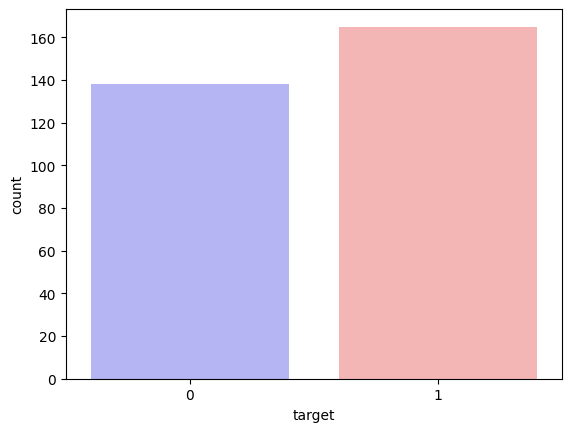

In [ ]:
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [ ]:
countNoDisease = len(df[df.target==0])
print('countNoDisease : ', countNoDisease)

countHaveDisease = len(df[df.target==1])
print('countHaveDisease : ', countHaveDisease)

print("Percentage of patients haven't heart disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of patients have heart disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

countNoDisease :  138
countHaveDisease :  165
Percentage of patients haven't heart disease: 45.54%
Percentage of patients have heart disease: 54.46%


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


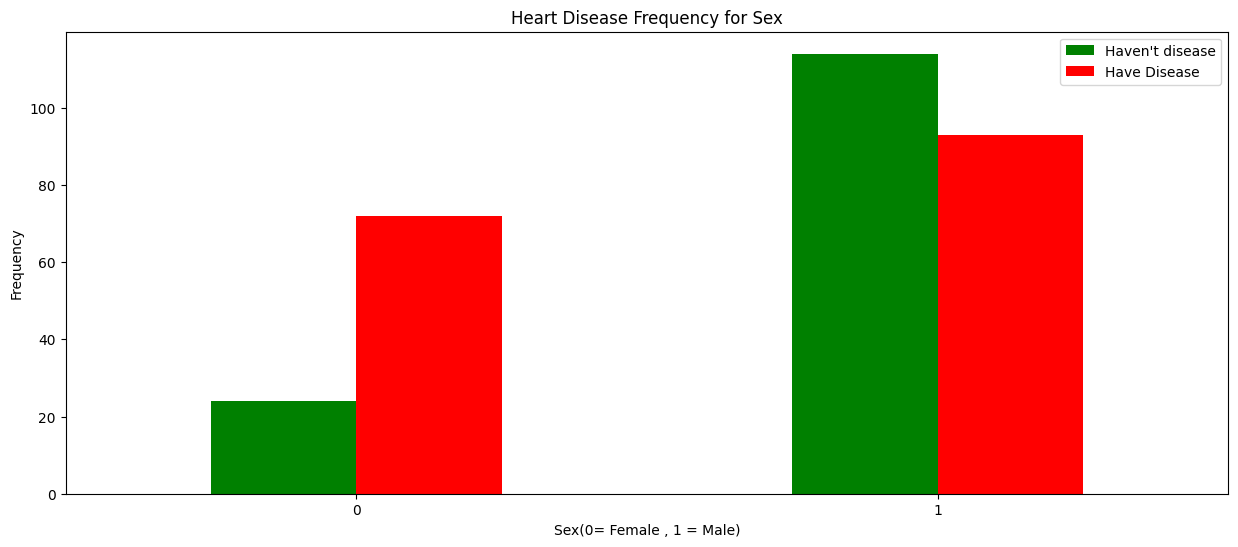

In [ ]:
# MALE VS FEMALE
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15,6),color=['green','red'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex(0= Female , 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't disease","Have Disease"])
plt.ylabel('Frequency')
plt.show()

Observations:
1. Males have a higher count than females, both with and without the disease
2. In males, the frequency of no heart disease is higher
3. In Female, the frequency of heart disease count is higher.

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
df[(df['sex'] == 1) & (df['target'].isin([0, 1]))].shape[0]

207

In [ ]:
df.sex[df.target==1].value_counts()

1    93
0    72
Name: sex, dtype: int64

In [ ]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

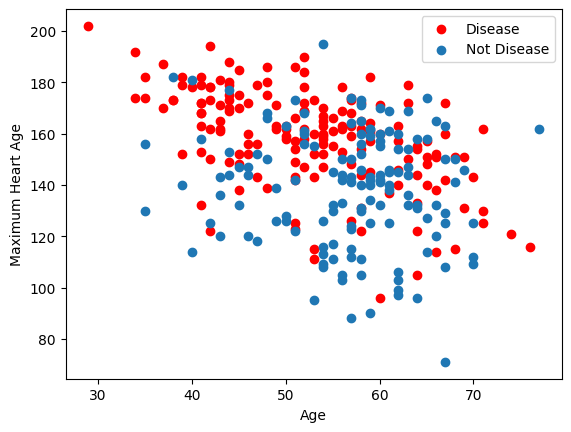

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(['Disease','Not Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Age')
plt.show()

# **Creating Dummy Variable**

Since 'cp','thal' and 'slope' are categorical variables we'll turn them into dummy variables

In [ ]:
a = pd.get_dummies(df['cp'], prefix='cp')
b = pd.get_dummies(df['thal'], prefix='thal')
c = pd.get_dummies(df['slope'], prefix='slope')

# pd.get_dummies() function in Pandas is used to convert categorical variable(s)
# into dummy/indicator variables
# This is often used for one-hot encoding,
# where categorical variables are represented as binary vectors.

In [ ]:
a

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [ ]:
b

,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,0,0,0,1
300,0,0,0,1
301,0,0,0,1


In [ ]:
c

,slope_0,slope_1,slope_2
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
298,0,1,0
299,0,1,0
300,0,1,0
301,0,1,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
frames = [df,a,b,c]
df = pd.concat(frames, axis=1)
df.head(2)

# pd.concat is a function in the Pandas library used for concatenating (joining)
# two or more pandas objects along a particular axis, either rows or columns.
# It can be used to concatenate Series, DataFrames, or Panel objects.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'cp_0', 'cp_1',
       'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0',
       'slope_1', 'slope_2'],
      dtype='object')

In [ ]:
df = df.drop(columns=['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0',
       'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

## Splitting the Data

In [ ]:
X = df.drop(['target'], axis=1)
y= df['target']

#axis=1: This parameter specifies that you want to drop a column (axis=1).

In [ ]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 21) (242, 21) (61, 21)


## Machine Learning Model

**Let's play with differet Machine Learning Algorithms,  from data we can say that this is a classification problem**

# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

lr.fit(X_train, y_train)

acc_lr= round(lr.score(X_train, y_train)*100, 2)

print(str(acc_lr) + " Percentage")


86.36 Percentage


In [ ]:
print(acc_lr , " Percentage")

86.36  Percentage


# 2. Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
acc_svc = round(svc.score(X_train,y_train)*100, 2)
print(str(acc_svc)+ ' Percentage')

66.53 Percentage


# 3. K-Nearest Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

acc_knn = round(knn.score(X_train, y_train)*100, 2)
print(str(acc_knn)+ ' Percentage')


78.1 Percentage


# 4. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
acc_dt = round(dt.score(X_train, y_train)*100, 2)

print(str(acc_dt)+ ' Percentage')

100.0 Percentage


# 5. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

acc_rf = round(rf.score(X_train, y_train)*100, 2)
print(str(acc_rf)+ ' Percentage')

100.0 Percentage


# 6. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
acc_nb = round(nb.score(X_train, y_train)*100,2)

print(str(acc_nb)+" Percentage")

## Comparing Models

# Let's compare the accuracy score of all models used above

In [ ]:
models = pd.DataFrame({
    'Models': ['Logistic Regression','Support Vector','KNN', 'Decision tree', 'Random Forest', 'Naive Bayes'],
    'Score': [acc_lr, acc_svc, acc_knn, acc_dt, acc_rf, acc_nb]
})

models.sort_values(by='Score', ascending = False)

,Models,Score
3,Decision tree,100.00
4,Random Forest,100.00
0,Logistic Regression,86.36
5,Naive Bayes,84.71
2,KNN,78.10
1,Support Vector,66.53


From above table we can see that Decision Tree and Random Forest have 100% accuaracy, but above scores are based on Train datasets

So, our task is now to check accuracy_score on Test data

So, let's check

In [ ]:
from sklearn.metrics import accuracy_score

Applying predict method to all algorithms

In [ ]:
lr_pred = lr.predict(X_test) # Logistic Regression
svm_pred = svc.predict(X_test)  # Support vector
knn_pred = knn.predict(X_test) # K-Nearest
dt_pred = dt.predict(X_test) # # Decision tree
rf_pred = rf.predict(X_test) # random Forest
nb_pred = rf.predict(X_test) # Neive Bayes

 Time to check accuaracy_score on test

In [ ]:
test_lr = round(accuracy_score(lr_pred, y_test)*100, 2)
test_svm = round(accuracy_score(svm_pred, y_test)*100, 2)
test_knn = round(accuracy_score(knn_pred, y_test)*100, 2)

test_dt = round(accuracy_score(dt_pred, y_test)*100,2)
test_rf = round(accuracy_score(rf_pred, y_test)*100, 2)
test_nb = round(accuracy_score(nb_pred, y_test)*100, 2)

test_models = pd.DataFrame({
    'Models':['Logistic Regression', 'Support Vector', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Score(Test Data)':[test_lr, test_svm, test_knn, test_dt, test_rf, test_nb]
})

test_models.sort_values(by='Score(Test Data)', ascending=False)

,Models,Score(Test Data)
4,Random Forest,88.52
5,Naive Bayes,88.52
0,Logistic Regression,85.25
3,Decision Tree,77.05
1,Support Vector,68.85
2,KNN,63.93


In [ ]:
y_test.shape

(61,)

In [ ]:
len(rf_pred)

61

From above two tables, We can see that **Random Forest** has better score on both test and train scores.
So will evaluate our model on **Random Forest**

# **Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# **Classification Report**

In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



# **Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
cm


array([[22,  5],
       [ 2, 32]])

# **Visualize**

Text(0.5, 1.0, 'Confusion Matrix')

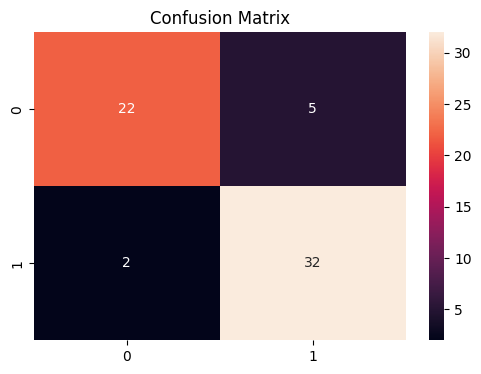

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot= True)
plt.title('Confusion Matrix')